# Item A)

# Usando o FOR

In [1]:
def escala_for(alpha, x):
    """
    Multiplica cada elemento do vetor x pelo escalar alpha usando um laço for.

    Parâmetros:
    alpha -- escalar (número real)
    x -- vetor NumPy (array)

    Retorno:
    y -- novo vetor com os elementos multiplicados por alpha
    """
    y = np.empty_like(x)             # Cria um vetor vazio com o mesmo tamanho e tipo de x
    for i in range(len(x)):          # Percorre cada índice do vetor
        y[i] = alpha * x[i]          # Multiplica o elemento correspondente por alpha
    return y                         # Retorna o vetor resultante

# Usando o Numpy

In [2]:
import numpy as np
# -----------------------------------------
# Função 2: Multiplicação escalar-vetor com NumPy (vetorizado)
# -----------------------------------------
def escala_numpy(alpha, x):
    """
    Realiza a multiplicação escalar-vetor usando operações vetorizadas do NumPy.

    Parâmetros:
    alpha -- escalar (número real)
    x -- vetor NumPy (array)

    Retorno:
    y -- vetor resultante da multiplicação escalar vetorizada
    """
    return alpha * x  # NumPy lida com vetores diretamente, tornando o código mais simples e rápido

# Item B)

Para o item B, o código em Fortran foi rodado de forma paralela ao introduzido, uma vez que deu problema pra rodar de forma convencional. O resultado obtido foi de 0.0000s

# Item C)

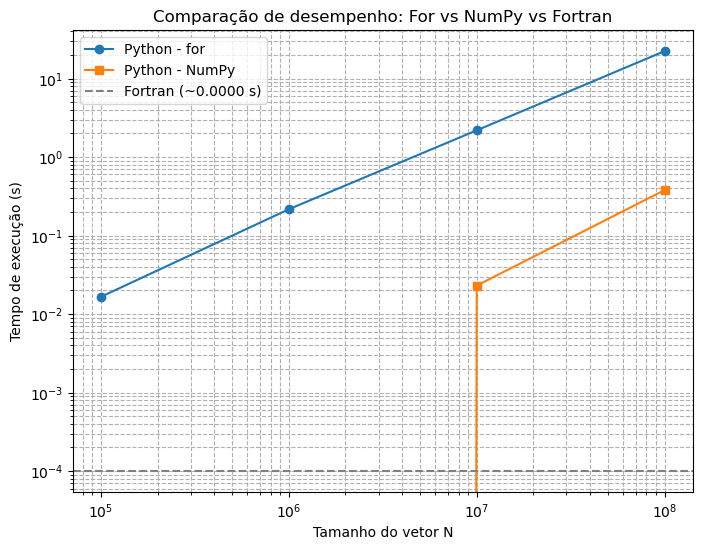

In [4]:
import numpy as np                # Importa o NumPy para uso de vetores e operações vetorizadas
import time                      # Importa o time para medição do tempo de execução
import matplotlib.pyplot as plt  # Importa a biblioteca de plotagem matplotlib

# -----------------------------------------
# Função 1: Multiplicação escalar-vetor usando um laço for tradicional
# -----------------------------------------
def escala_for(alpha, x):
    y = np.empty_like(x)             # Cria um vetor vazio com o mesmo tamanho e tipo de x
    for i in range(len(x)):          # Itera sobre cada elemento do vetor
        y[i] = alpha * x[i]          # Multiplica o valor pelo escalar alpha
    return y                         # Retorna o vetor resultante

# -----------------------------------------
# Função 2: Multiplicação escalar-vetor usando operação vetorizada com NumPy
# -----------------------------------------
def escala_numpy(alpha, x):
    return alpha * x                 # Operação vetorizada nativa do NumPy

# -----------------------------------------
# Valores de N a serem testados (tamanhos dos vetores)
# -----------------------------------------
N_values = [10**5, 10**6, 10**7, 10**8]  # Tamanhos crescentes para testar escalabilidade
alpha = 2.5                              # Escalar a ser multiplicado por cada elemento do vetor

# Listas para armazenar os tempos medidos para cada abordagem
tempos_for = []
tempos_numpy = []

# -----------------------------------------
# Loop principal: mede os tempos para cada valor de N
# -----------------------------------------
for N in N_values:
    x = np.ones(N, dtype=np.float64)  # Cria vetor x com todos os elementos iguais a 1.0

    # --- Método com laço for ---
    y_for = np.empty(N, dtype=np.float64)  # Inicializa vetor de saída
    start = time.time()                    # Inicia a contagem de tempo
    for i in range(N):
        y_for[i] = alpha * x[i]            # Multiplicação escalar elemento a elemento
    end = time.time()
    tempos_for.append(end - start)        # Armazena o tempo decorrido

    # --- Método vetorizado com NumPy ---
    start = time.time()                   # Inicia a contagem de tempo
    y_numpy = alpha * x                   # Executa a operação vetorizada
    end = time.time()
    tempos_numpy.append(end - start)     # Armazena o tempo decorrido

# -----------------------------------------
# Plotagem do gráfico em escala log-log
# -----------------------------------------
plt.figure(figsize=(8,6))  # Define o tamanho do gráfico

# Plota o tempo do método com for
plt.loglog(N_values, tempos_for, 'o-', label='Python - for')

# Plota o tempo do método com NumPy
plt.loglog(N_values, tempos_numpy, 's-', label='Python - NumPy')

# Linha de referência representando o tempo de execução do código Fortran (~0.0000 s)
plt.axhline(y=0.0001, color='gray', linestyle='--', label='Fortran (~0.0000 s)')

# Configurações do gráfico
plt.xlabel('Tamanho do vetor N')                    # Rótulo do eixo X
plt.ylabel('Tempo de execução (s)')                 # Rótulo do eixo Y
plt.title('Comparação de desempenho: Escala vetor') # Título do gráfico
plt.legend()                                        # Adiciona legenda
plt.grid(True, which="both", ls="--")               # Grade do gráfico
plt.tight_layout()                                  # Ajusta layout automaticamente
plt.show()                                          # Exibe o gráfico


# Item D)

Usando o FOR

In [5]:
def soma_for(alpha, x):
    soma = 0.0
    for i in range(len(x)):
        soma += alpha * x[i]
    return soma

 Usando o numpy.dot

In [6]:
def soma_for(alpha, x):
    soma = 0.0
    for i in range(len(x)):
        soma += alpha * x[i]
    return soma

Usando o numba

In [7]:
from numba import njit

@njit
def soma_numba(alpha, x):
    soma = 0.0
    for i in range(len(x)):
        soma += alpha * x[i]
    return soma

# Comparação de tempo

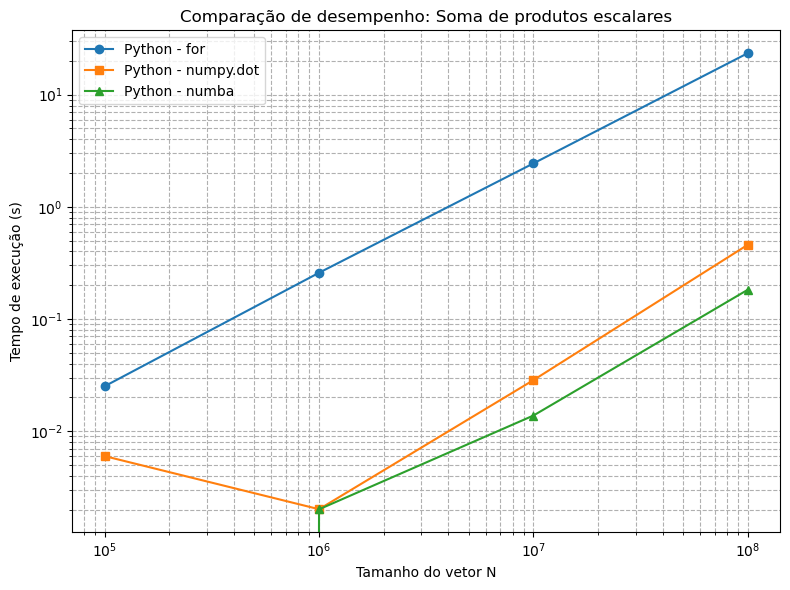

In [8]:
import numpy as np                # Importa o NumPy para operações numéricas
import time                      # Importa o time para medir o tempo de execução
import matplotlib.pyplot as plt  # Importa o matplotlib para plotar os gráficos
from numba import njit           # Importa o decorador @njit para compilar funções com Numba (Just-In-Time)

# -----------------------------------------
# Função 1: Soma usando um laço for tradicional em Python
# -----------------------------------------
def soma_for(alpha, x):
    soma = 0.0
    for i in range(len(x)):      # Itera sobre cada elemento do vetor x
        soma += alpha * x[i]     # Multiplica pelo escalar alpha e acumula o resultado
    return soma

# -----------------------------------------
# Função 2: Soma usando numpy.dot (produto escalar com vetor de 1s)
# -----------------------------------------
def soma_dot(alpha, x):
    return alpha * np.dot(np.ones_like(x), x)
    # np.ones_like(x) cria um vetor de 1s do mesmo tamanho que x
    # np.dot realiza o produto escalar entre esse vetor de 1s e o vetor x
    # Isso equivale a somar todos os elementos de x e multiplicar por alpha

# -----------------------------------------
# Função 3: Soma usando Numba (compila a função para execução mais rápida)
# -----------------------------------------
@njit
def soma_numba(alpha, x):
    soma = 0.0
    for i in range(len(x)):
        soma += alpha * x[i]
    return soma
    # Estrutura idêntica ao for tradicional, mas acelerada por compilação JIT

# -----------------------------------------
# Definição dos valores de N e do escalar alpha
# -----------------------------------------
N_values = [10**5, 10**6, 10**7, 10**8]  # Tamanhos crescentes dos vetores
alpha = 2.5                              # Valor do escalar a ser multiplicado

# Listas para armazenar os tempos medidos
tempos_for = []
tempos_dot = []
tempos_numba = []

# -----------------------------------------
# Loop principal: mede os tempos de execução para cada tamanho N
# -----------------------------------------
for N in N_values:
    x = np.ones(N, dtype=np.float64)  # Cria vetor x com N elementos iguais a 1.0

    # --- Tempo para função com for ---
    start = time.time()               # Inicia cronômetro
    soma_for(alpha, x)                # Executa a função
    tempos_for.append(time.time() - start)  # Calcula tempo decorrido e salva

    # --- Tempo para função com numpy.dot ---
    start = time.time()
    soma_dot(alpha, x)
    tempos_dot.append(time.time() - start)

    # --- Tempo para função com numba ---
    soma_numba(alpha, np.ones(10))   # "Aquecimento" para compilar com JIT (feito apenas uma vez)
    start = time.time()
    soma_numba(alpha, x)
    tempos_numba.append(time.time() - start)

# -----------------------------------------
# Plotagem do gráfico em escala log-log
# -----------------------------------------
plt.figure(figsize=(8,6))  # Define o tamanho da figura

# Plota os tempos de execução com diferentes símbolos e cores
plt.loglog(N_values, tempos_for, 'o-', label='Python - for')
plt.loglog(N_values, tempos_dot, 's-', label='Python - numpy.dot')
plt.loglog(N_values, tempos_numba, '^-', label='Python - numba')

# Configurações do gráfico
plt.xlabel('Tamanho do vetor N')                  # Rótulo do eixo X
plt.ylabel('Tempo de execução (s)')               # Rótulo do eixo Y
plt.title('Comparação de desempenho: Soma de produtos escalares')  # Título do gráfico
plt.legend()                                      # Mostra legenda
plt.grid(True, which="both", ls="--")             # Adiciona grade ao gráfico
plt.tight_layout()                                # Ajusta layout automaticamente
plt.show()                                        # Exibe o gráfico
